# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset::https://www.kaggle.com/datasets/juhibhojani/airline-reviews

Import the necessary libraries and create your dataframe(s).

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
df = pd.read_csv("Airline_review.csv")

In [35]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [36]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [37]:
df.columns

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

In [38]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(23171, 20)
Unnamed: 0                  int64
Airline Name               object
Overall_Rating             object
Review_Title               object
Review Date                object
Verified                     bool
Review                     object
Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                object
dtype: object


In [39]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Unnamed: 0' 'Seat Comfort' 'Cabin Staff Service' 'Food & Beverages'
 'Ground Service' 'Inflight Entertainment' 'Wifi & Connectivity'
 'Value For Money']
['Airline Name' 'Overall_Rating' 'Review_Title' 'Review Date' 'Verified'
 'Review' 'Aircraft' 'Type Of Traveller' 'Seat Type' 'Route' 'Date Flown'
 'Recommended']


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [40]:
# missing data % for each feature.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Airline Name - 0%
Overall_Rating - 0%
Review_Title - 0%
Review Date - 0%
Verified - 0%
Review - 0%
Aircraft - 69%
Type Of Traveller - 16%
Seat Type - 5%
Route - 17%
Date Flown - 16%
Seat Comfort - 18%
Cabin Staff Service - 18%
Food & Beverages - 37%
Ground Service - 21%
Inflight Entertainment - 53%
Wifi & Connectivity - 74%
Value For Money - 5%
Recommended - 0%


In [41]:
# correlation percentage
df.corr()

,Unnamed: 0,Verified,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
Unnamed: 0,1.000000,0.000302,-0.028074,-0.012987,-0.021551,-0.009136,-0.045173,-0.013525,0.001532
Verified,0.000302,1.000000,-0.010705,-0.009041,0.012481,-0.010860,0.128767,0.032176,-0.078149
Seat Comfort,-0.028074,-0.010705,1.000000,0.755523,0.722211,0.714854,0.618230,0.662232,0.759475
Cabin Staff Service,-0.012987,-0.009041,0.755523,1.000000,0.769532,0.714276,0.591799,0.626893,0.751843
Food & Beverages,-0.021551,0.012481,0.722211,0.769532,1.000000,0.690667,0.671147,0.691146,0.752053
Ground Service,-0.009136,-0.010860,0.714854,0.714276,0.690667,1.000000,0.615878,0.640562,0.813856
Inflight Entertainment,-0.045173,0.128767,0.618230,0.591799,0.671147,0.615878,1.000000,0.778482,0.592668
Wifi & Connectivity,-0.013525,0.032176,0.662232,0.626893,0.691146,0.640562,0.778482,1.000000,0.669146
Value For Money,0.001532,-0.078149,0.759475,0.751843,0.752053,0.813856,0.592668,0.669146,1.000000


In [26]:
#I observed correlation of 'Inflight Entertainment', 'Wifi & Connectivity' columns is <0.5,
# I decided to drop these columns

In [42]:
# after looking null%,and correlation% Wifi & Connectivity,"Inflight Entertainment","Aircraft" columns has more null%.
# Idecided to drop these.
df.drop(columns=["Wifi & Connectivity","Inflight Entertainment","Aircraft"],inplace=True)

In [43]:
# Forward-fill (fill missing values with the previous valid value)
df['Type Of Traveller'] = df['Type Of Traveller'].fillna(method='ffill')

In [44]:
df['Type Of Traveller'].isnull().sum()

0

In [45]:
# Replace the Missing
df['Seat Type'] = df['Seat Type'].fillna('_MISSING_')

In [ ]:
# Mode represents the most frequent value in a categorical variable.

# It is used to impute missing values in categorical data because it preserves the distribution and frequency of the categories.

In [46]:
df['Seat Type'] = df['Seat Type'].mode().values[0]

In [47]:
df['Seat Type'].isnull().sum()

0

In [48]:
df['Date Flown'] = df['Date Flown'].mode().values[0]

In [49]:
df['Date Flown'].isnull().sum()

0

In [ ]:
# feature is a numeric variable,applied missing data imputation. 
# Replaced the missing values with the average or median value from the data of the same feature that is not missing.

In [50]:
df['Seat Comfort']= df['Seat Comfort'].fillna(df['Seat Comfort'].median())
df['Cabin Staff Service']= df['Cabin Staff Service'].fillna(df['Cabin Staff Service'].median())
df['Ground Service'] = df['Ground Service'].fillna(df['Ground Service'].median())
df['Value For Money'] = df['Value For Money'].fillna(df['Value For Money'].median())
df['Food & Beverages'] = df['Food & Beverages'].fillna(df['Food & Beverages'].median())

In [51]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Unnamed: 0 - 0%
Airline Name - 0%
Overall_Rating - 0%
Review_Title - 0%
Review Date - 0%
Verified - 0%
Review - 0%
Type Of Traveller - 0%
Seat Type - 0%
Route - 17%
Date Flown - 0%
Seat Comfort - 0%
Cabin Staff Service - 0%
Food & Beverages - 0%
Ground Service - 0%
Value For Money - 0%
Recommended - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [52]:
# Depending on if a column is numeric or categorical with determine what method 
# to use for outliers

# find the datatype of each column
df.dtypes

Unnamed: 0               int64
Airline Name            object
Overall_Rating          object
Review_Title            object
Review Date             object
Verified                  bool
Review                  object
Type Of Traveller       object
Seat Type               object
Route                   object
Date Flown              object
Seat Comfort           float64
Cabin Staff Service    float64
Food & Beverages       float64
Ground Service         float64
Value For Money        float64
Recommended             object
dtype: object

In [53]:
# I am using describe to find out outliers,food & Beverages showed feature has outliers. 
df.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money
count,23171.00000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000
mean,11585.00000,2.686807,2.895214,2.346424,2.073713,2.430409
std,6689.03588,1.335065,1.450486,1.236760,1.523264,1.559917
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5792.50000,1.000000,1.000000,2.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,3.000000,3.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000


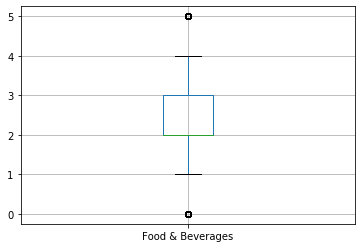

In [54]:
df.boxplot(column=['Food & Beverages'])

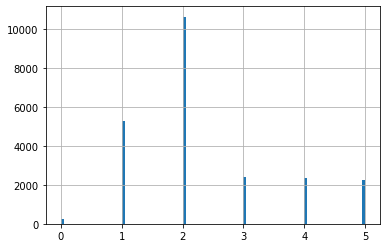

In [55]:
df['Food & Beverages'].hist(bins=100)

In [56]:
df['Food & Beverages'].value_counts()

2.0    10638
1.0     5283
3.0     2424
4.0     2332
5.0     2242
0.0      252
Name: Food & Beverages, dtype: int64

In [ ]:
# value 0 and 1 seems to be outliers here,at this time i am not convinced to remove any outliers column

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [57]:
df.columns

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Type Of Traveller', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Value For Money', 'Recommended'],
      dtype='object')

In [58]:
# In the EDA process, I discovered that some of the columns are redundant so I am going to remove these ones first.
df.drop(columns=['Unnamed: 0','Review Date','Date Flown','Route'],inplace=True)

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [59]:
df['Overall_Rating'].value_counts()

1    11595
2     2296
9     1768
8     1757
3     1356
7     1193
4      859
n      842
5      830
6      675
Name: Overall_Rating, dtype: int64

In [60]:
# I Observed overall_Rating column has 1 to 9,I assumed there might be mistake type n instead of 10
# I decided to replace 10 inplace of 10.
df['Overall_Rating']=df['Overall_Rating'].replace('n',10)

In [61]:
df['Overall_Rating'].value_counts()

1     11595
2      2296
9      1768
8      1757
3      1356
7      1193
4       859
10      842
5       830
6       675
Name: Overall_Rating, dtype: int64

In [62]:
# I observed recommended column values are string data,For analysis purpose I decided to replace no as 0 and yes as 1.
df['Recommended'].value_counts()

no     15364
yes     7807
Name: Recommended, dtype: int64

In [63]:
df['Recommended']=df['Recommended'].map({'no':0,'yes':1})


In [64]:
df['Recommended'].value_counts()

0    15364
1     7807
Name: Recommended, dtype: int64

In [65]:
# Exporting cleaned data set
df.to_csv("C:\\Users\\prave\\Desktop\\LaunchcodeW+\\cleaning-data-checkpoint\\cleaning_checkpoint.csv")


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
   Yes, in some columns there were missing values and irregular data.
2. Did the process of cleaning your data give you new insights into your dataset?
   Yes, I am more familiar with the few entities I'm actually interested in exploring
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
   No